In [64]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import gensim
from gensim import corpora
import re
import string
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from gensim.models import CoherenceModel, LdaModel
import spacy
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamulticore import LdaMulticore
import numpy as np
from textblob import TextBlob

# Enable inline plotting for Jupyter Notebook
%matplotlib inline


In [51]:
file_path = '../data/raw/raw_analyst_ratings.csv'
df = pd.read_csv(file_path)
print(df.head())
df.info()


   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-05-26 04:30:07-04:00 

In [52]:
# check for null
print(df.isnull().sum())

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64


In [53]:

print(df['stock'].value_counts())

stock
MRK     3333
MS      3238
NVDA    3146
MU      3142
QQQ     3106
        ... 
PLW        1
RFT        1
WIP        1
ONEQ       1
BHL        1
Name: count, Length: 6204, dtype: int64


# 📊 Descriptive Statistics

## 1.1 Article Frequency Per Publisher

- **Objective**: Analyze the number of articles contributed by each publisher to identify the most active ones.
- **Tasks**:
  - 🧮 Count total articles per publisher.
  - 📊 Plot the overall distribution of article counts.
  - 📈 Visualize top publishers using a bar chart.
  - 📋 Summarize with key statistics (mean, median, max, etc.).


### 🧮 Article Frequency Per Publisher

In this section, we analyze the number of articles published by each publisher to understand who the most active contributors are in the dataset.  


In [54]:
# Count total articles per publisher
publisher_counts = df['publisher'].value_counts()

# Print top 20 publishers by article count
print(publisher_counts.head(20))


publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Vick Meyer            24826
webmaster             20313
Benzinga_Newsdesk     19410
Zacks                 19390
Jayson Derrick        19050
Allie Wickman         18317
Shanthi Rexaline      16640
Craig Jones           16221
Wayne Duggan          12897
Nelson Hem            12590
Name: count, dtype: int64


### 📊 Distribution of Article Counts
- Analyze the overall distribution of article counts across all publishers.
- Use a histogram and boxplot for a clear visualization of the data spread.


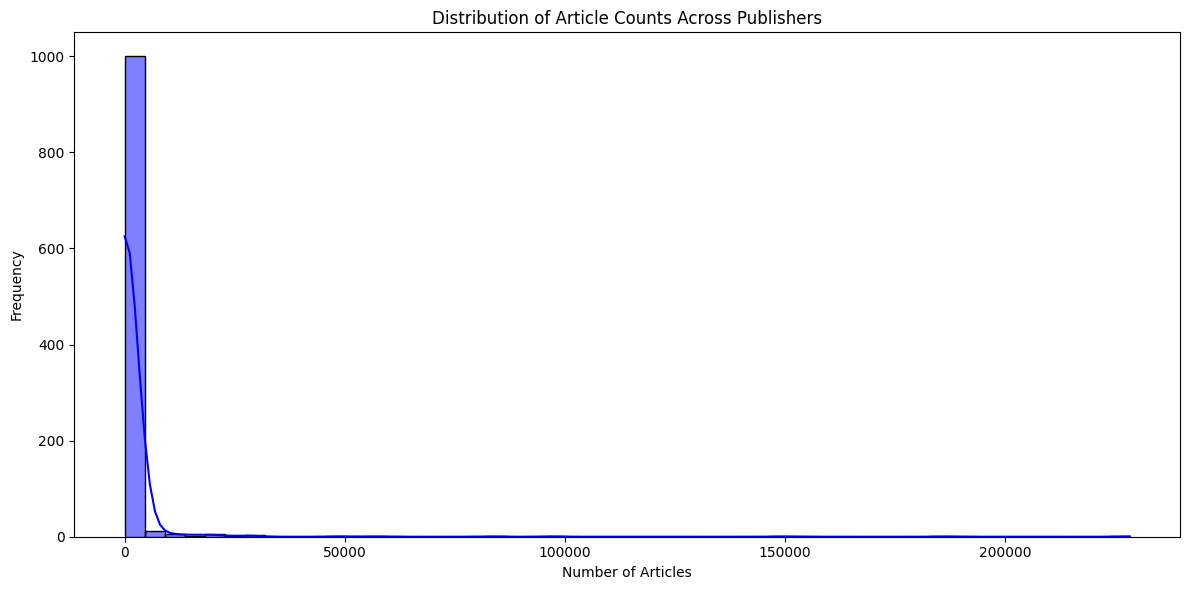

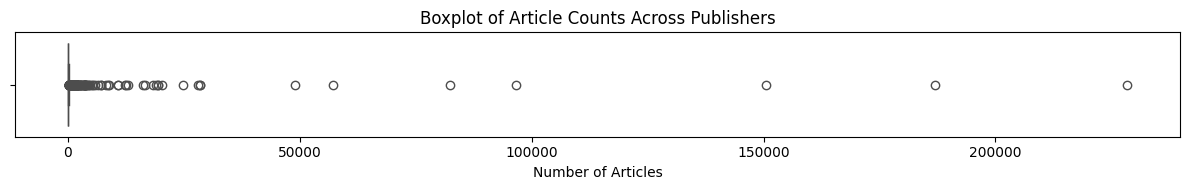

In [55]:
# Plot overall distribution of article counts using a histogram
plt.figure(figsize=(12,6))
sns.histplot(publisher_counts, bins=50, kde=True, color='blue')
plt.title('Distribution of Article Counts Across Publishers')
plt.xlabel('Number of Articles')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Plot overall distribution of article counts using a boxplot
plt.figure(figsize=(12,2))
sns.boxplot(x=publisher_counts, color='orange')
plt.title('Boxplot of Article Counts Across Publishers')
plt.xlabel('Number of Articles')
plt.tight_layout()
plt.show()


### 🔍 Insights from the Distribution of Article Counts
- **Observation**: A significant number of publishers have very few articles, as indicated by the tall bar near zero on the histogram.
- **Interpretation**: This suggests a **long-tail distribution**, where only a few publishers are responsible for the majority of the content.
- **Next Steps**:
  - Explore the top contributors in greater detail.
  - Consider filtering out publishers with negligible contributions for further analysis.



We will display the top 20 publishers by article count and visualize the distribution using a horizontal bar chart.


C:\Users\helin\AppData\Local\Temp\ipykernel_25388\3651571591.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=publisher_counts.head(20).values, y=publisher_counts.head(20).index, palette='viridis')


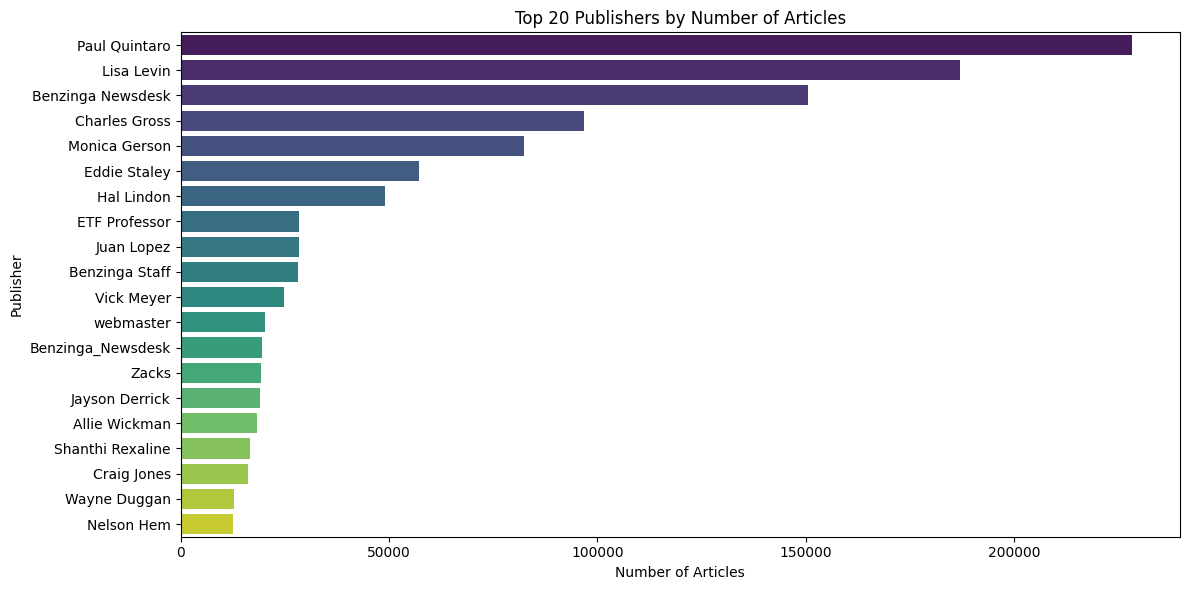

In [56]:
# Plot the top 20 publishers
plt.figure(figsize=(12,6))
sns.barplot(x=publisher_counts.head(20).values, y=publisher_counts.head(20).index, palette='viridis')
plt.title('Top 20 Publishers by Number of Articles')
plt.xlabel('Number of Articles')
plt.ylabel('Publisher')
plt.tight_layout()
plt.show()

### 📝 Observations on Publisher Frequency

* **Top Publishers:**

  * `Paul Quintaro` and `Lisa Levin` are the most prolific contributors.
  * They contribute significantly more articles than others.

* **Insights:**

  * The dataset is skewed towards a few top contributors.
  * These publishers may influence trends and insights.

📋 Article Counts Summary
Mean, median, max, min, and std deviation of articles per publisher.

In [57]:
# Calculate key statistics for article counts per publisher
article_counts = df['publisher'].value_counts()

mean_count = article_counts.mean()
median_count = article_counts.median()
max_count = article_counts.max()
min_count = article_counts.min()
std_dev = article_counts.std()

print(f"Mean articles per publisher: {mean_count:.2f}")
print(f"Median articles per publisher: {median_count}")
print(f"Max articles by a single publisher: {max_count}")
print(f"Min articles by a single publisher: {min_count}")
print(f"Standard deviation: {std_dev:.2f}")


Mean articles per publisher: 1361.05
Median articles per publisher: 11.0
Max articles by a single publisher: 228373
Min articles by a single publisher: 1
Standard deviation: 11501.95


Analysis
The distribution is highly skewed: a few publishers contribute a huge number of articles, while most have very few. The median (11) is much lower than the mean (1361), showing many small contributors and a few dominant ones. High standard deviation confirms this variability.

# 🚀 Next Steps: Headline Length Analysis

- ✍️ **Calculate headline length** 

- 📊 **Compute summary statistics** (mean, median, min, max, std)

- 📈 **Visualize distribution** using histogram or density plot

- 🔍 **Compare average headline lengths** across publishers

- 📉 **Calculate variance** of headline lengths by publisher

- ⏳ **Analyze trends** in average headline length over time


# ✍️ Calculate headline length (words)

We'll add a new column to the dataframe that counts the number of words in each headline.

In [58]:
# Calculate headline length in words
df['headline_word_count'] = df['headline'].apply(lambda x: len(str(x).split()))

# Preview the new column
print(df[['headline', 'headline_word_count']].head())


                                            headline  headline_word_count
0            Stocks That Hit 52-Week Highs On Friday                    7
1         Stocks That Hit 52-Week Highs On Wednesday                    7
2                      71 Biggest Movers From Friday                    5
3       46 Stocks Moving In Friday's Mid-Day Session                    7
4  B of A Securities Maintains Neutral on Agilent...                   14


✅ Headline word count calculated
Each headline now has a corresponding word count in the new column headline_word_count, reflecting the number of words per headline.

In [59]:
# Compute summary statistics for headline word counts
headline_stats = df['headline_word_count'].describe()
print(headline_stats)


count    1.407328e+06
mean     1.141671e+01
std      6.352997e+00
min      1.000000e+00
25%      7.000000e+00
50%      1.000000e+01
75%      1.300000e+01
max      7.700000e+01
Name: headline_word_count, dtype: float64


📊 Summary statistics for headline word counts
Calculated mean, median, min, max, and standard deviation of headline lengths in words.
The data shows most headlines are fairly concise, around 10-13 words on average.

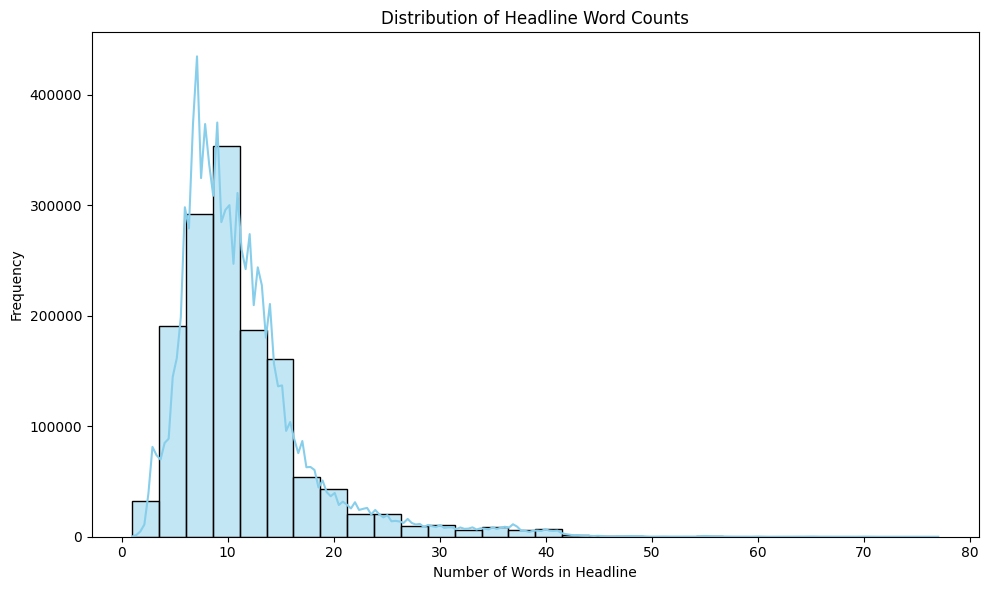

In [60]:
plt.figure(figsize=(10,6))
sns.histplot(df['headline_word_count'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Headline Word Counts')
plt.xlabel('Number of Words in Headline')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


📈 Headline Word Count Distribution
The histogram shows the frequency of headlines by word count. Most headlines cluster around 7 to 13 words, confirming the summary statistics and indicating headline lengths tend to be concise.

# 🔍 Average Headline Length by Publisher
This chart compares the average headline length across the top 20 publishers, highlighting differences in how publishers craft their headlines.

C:\Users\helin\AppData\Local\Temp\ipykernel_25388\1305582681.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_headline_length.head(20).values, y=avg_headline_length.head(20).index, palette='magma')


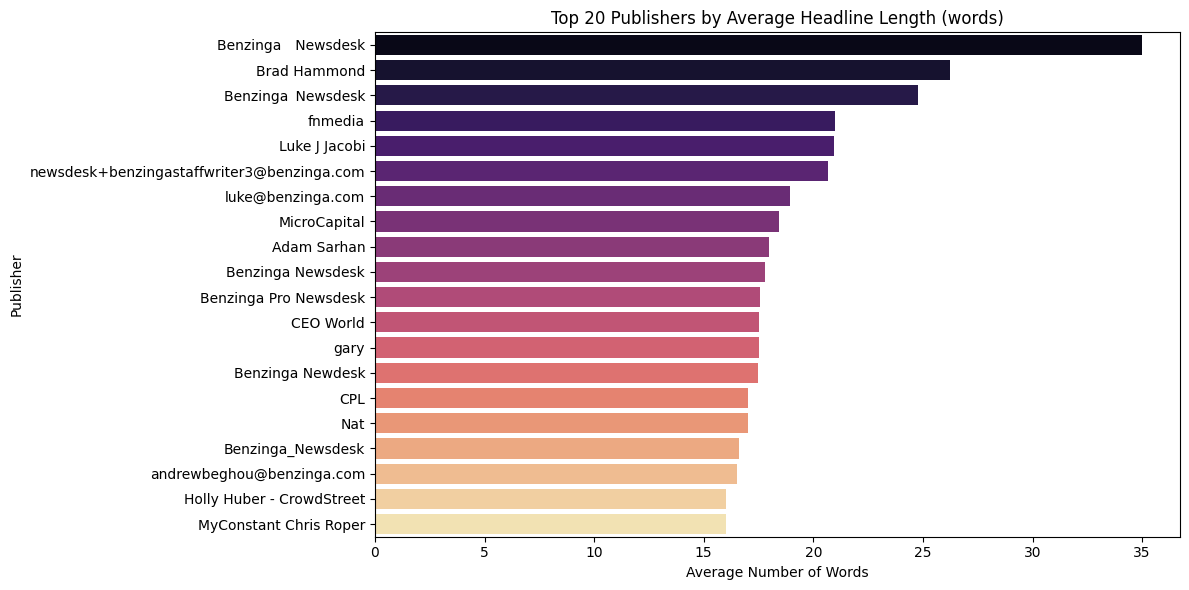

In [16]:
# Calculate average headline length per publisher
avg_headline_length = df.groupby('publisher')['headline_word_count'].mean().sort_values(ascending=False)

# Plot top 20 publishers by average headline length
plt.figure(figsize=(12,6))
sns.barplot(x=avg_headline_length.head(20).values, y=avg_headline_length.head(20).index, palette='magma')
plt.title('Top 20 Publishers by Average Headline Length (words)')
plt.xlabel('Average Number of Words')
plt.ylabel('Publisher')
plt.tight_layout()
plt.show()


### 🔍 Analysis: Average Headline Length by Publisher

* Average headline length ranges from 16 to 35 words.
* **Benzinga Newsdesk** and some authors write longer headlines (\~25–35 words).
* Most others have shorter headlines around 16–18 words.
* Differences likely reflect varied writing styles or content types.


# 📉 Variance of Headline Lengths by Publisher
This measures how much headline lengths vary within each publisher’s articles. High variance means more inconsistency in headline length.

In [17]:
# Calculate variance of headline lengths by publisher
headline_variance = df.groupby('publisher')['headline_word_count'].var().sort_values(ascending=False)

# Show top 20 publishers by variance
print(headline_variance.head(20))


publisher
Brad Hammond                 154.446886
Benzinga Newsdesk            109.023542
Luke J Jacobi                102.825832
luke@benzinga.com            101.837617
Benzinga Newsdesk            100.074754
Benzinga_Newsdesk             91.136163
gary                          84.500000
Hao Jin                       77.875705
Bryan Stanford                71.866667
Benzinga  Newsdesk            66.962636
PacificTrader                 48.000000
Benzinga Newdesk              46.455633
Hal Lindon                    42.331896
Michael Snyder                41.777778
Benzinga Pro Newsdesk         40.911987
Devonte Kavanaugh             40.500000
andrewbeghou@benzinga.com     40.500000
lbjacobi                      40.079695
Above Average Odds            39.565789
Hedge Fund Live               35.904762
Name: headline_word_count, dtype: float64


📉 Headline Length Variance by Publisher
Brad Hammond has the highest variance (154.45), showing diverse headline lengths.

Various Benzinga Newsdesk entries also show high variance.

Other publishers have more consistent headline lengths.

This reflects different writing styles or content diversity across publishers.

# ⏳ Analyze Trends in Average Headline Length Over Time
Track how the average number of words per headline changes daily to identify patterns or shifts in headline style.

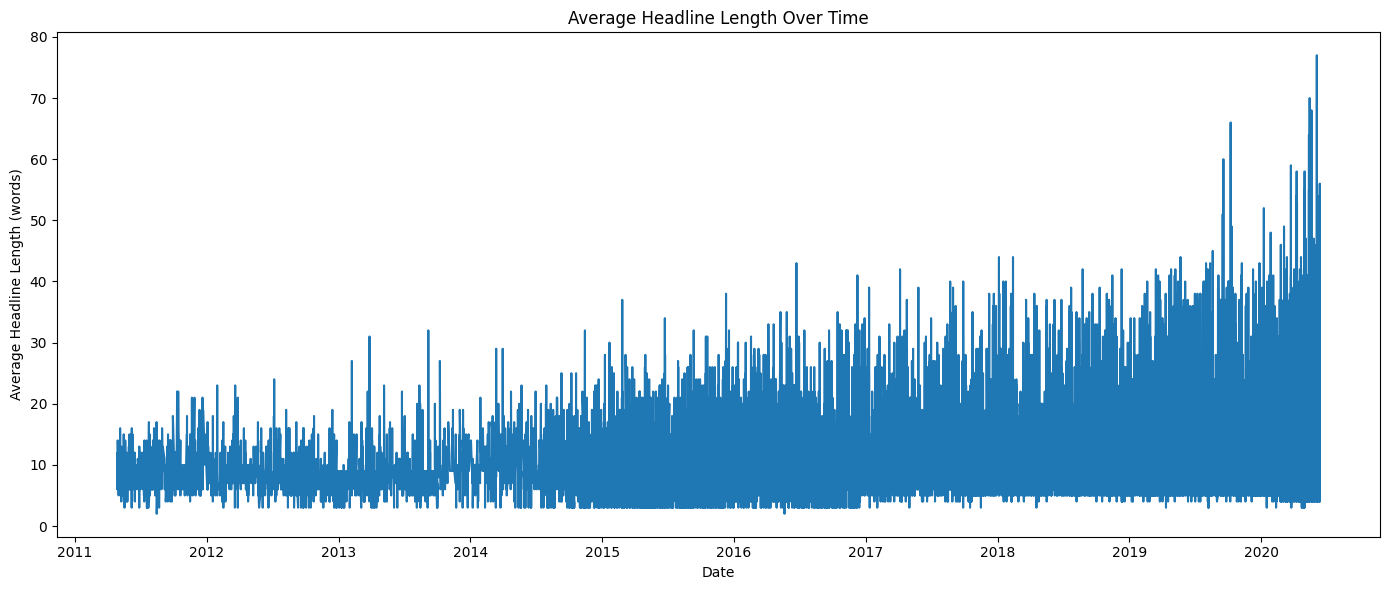

In [18]:
# Convert 'date' column to datetime if not already
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Group by date and calculate average headline word count
daily_avg_headline_length = df.groupby('date')['headline_word_count'].mean().reset_index()

# Plot the trend over time
plt.figure(figsize=(14,6))
sns.lineplot(data=daily_avg_headline_length, x='date', y='headline_word_count')
plt.title('Average Headline Length Over Time')
plt.xlabel('Date')
plt.ylabel('Average Headline Length (words)')
plt.tight_layout()
plt.show()


The graph shows the average headline length over time, generally trending upwards from 2011 to 2020, with significant volatility and occasional spikes. This suggests news headlines became progressively longer on average during this period, though with considerable daily fluctuations.

## ✍️ Text Analysis: Keyword Extraction
1. **Tokenize Headlines**
2. **Clean Text**
3. **Word Frequency**
4. **Stock Keywords**

1. **Tokenize Headlines**: Break headlines into words.  

In [19]:
# Tokenize headlines into individual words
import nltk
nltk.download('punkt')  # Ensure the tokenizer library is available

# Add a new column for tokenized words
df['headline_tokens'] = df['headline'].apply(nltk.word_tokenize)

# Display a sample of the dataframe with tokenized headlines
print(df[['headline', 'headline_tokens']].head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\helin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                            headline  \
0            Stocks That Hit 52-Week Highs On Friday   
1         Stocks That Hit 52-Week Highs On Wednesday   
2                      71 Biggest Movers From Friday   
3       46 Stocks Moving In Friday's Mid-Day Session   
4  B of A Securities Maintains Neutral on Agilent...   

                                     headline_tokens  
0    [Stocks, That, Hit, 52-Week, Highs, On, Friday]  
1  [Stocks, That, Hit, 52-Week, Highs, On, Wednes...  
2                [71, Biggest, Movers, From, Friday]  
3  [46, Stocks, Moving, In, Friday, 's, Mid-Day, ...  
4  [B, of, A, Securities, Maintains, Neutral, on,...  


2. **Clean Text**: Remove stop words, punctuation, and standardize words.

In [20]:
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\helin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\helin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\helin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
df['headline_tokens'] = df['headline'].apply(nltk.word_tokenize)
# Setup stopwords, lemmatizer and punctuation
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
punctuations = set(string.punctuation)

# Clean tokens function
def clean_tokens(tokens):
    cleaned = []
    for token in tokens:
        token = token.lower()
        if token not in stop_words and token not in punctuations:
            lemma = lemmatizer.lemmatize(token)
            cleaned.append(lemma)
    return cleaned

# Apply cleaning function on tokenized headlines
df['cleaned_tokens'] = df['headline_tokens'].apply(clean_tokens)

print(df[['headline_tokens', 'cleaned_tokens']].head())

                                     headline_tokens  \
0    [Stocks, That, Hit, 52-Week, Highs, On, Friday]   
1  [Stocks, That, Hit, 52-Week, Highs, On, Wednes...   
2                [71, Biggest, Movers, From, Friday]   
3  [46, Stocks, Moving, In, Friday, 's, Mid-Day, ...   
4  [B, of, A, Securities, Maintains, Neutral, on,...   

                                      cleaned_tokens  
0                [stock, hit, 52-week, high, friday]  
1             [stock, hit, 52-week, high, wednesday]  
2                       [71, biggest, mover, friday]  
3  [46, stock, moving, friday, 's, mid-day, session]  
4  [b, security, maintains, neutral, agilent, tec...  


Observations:
The headline_tokens column contains the raw tokens generated from the headlines.

The cleaned_tokens column shows the cleaned version of the tokens, with stop words and punctuation removed, and words lemmatized.

**Word Frequency**: Find and visualize the top 20 frequent words.  

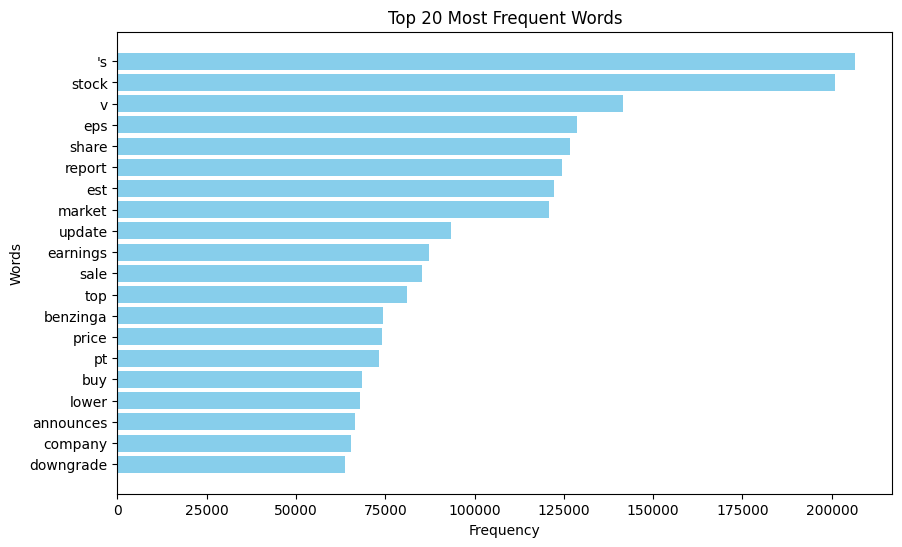

In [22]:
# Flatten the cleaned_tokens list into a single list of words
all_words = [word for tokens in df['cleaned_tokens'] for word in tokens]

# Calculate word frequencies
word_counts = Counter(all_words)

# Get the 20 most common words
top_words = word_counts.most_common(20)

# Split the top_words into two lists for plotting
words, counts = zip(*top_words)

# Plot the top 20 words
plt.figure(figsize=(10, 6))
plt.barh(words, counts, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 20 Most Frequent Words')
plt.gca().invert_yaxis()  # Invert y-axis for better visual order
plt.show()

In [23]:
# Import libraries
from collections import Counter
import pandas as pd

# Flatten cleaned tokens into a single list
all_cleaned_tokens = [token for tokens in df['cleaned_tokens'] for token in tokens]

# Calculate word frequencies
word_frequencies = Counter(all_cleaned_tokens)

# Get the top 20 most common words
top_20_words = word_frequencies.most_common(20)

# Convert to DataFrame
top_words_df = pd.DataFrame(top_20_words, columns=['Word', 'Frequency'])

# Display the table
from IPython.display import display
display(
    top_words_df.style.set_caption("Top 20 Most Frequent Words").set_table_styles(
        [{"selector": "caption", "props": [("text-align", "center"), ("font-weight", "bold")]}]
    )
)


,Word,Frequency
0,'s,206646
1,stock,201036
2,v,141496
3,eps,128801
4,share,126637
5,report,124456
6,est,122340
7,market,120863
8,update,93295
9,earnings,87183


These words represent the most recurring themes in the dataset and will inform further analysis, such as sentiment scoring and keyword association. 

4. **Stock Keywords**: Identify words tied to specific tickers. 

The code below performs the following steps:

Filters headlines that mention each ticker symbol or company name (case-insensitive).

Tokenizes and cleans the text by removing stopwords, punctuation, and numbers.

Counts the frequency of words within the filtered headlines.

Extracts the top 10 most frequent words related to each ticker, excluding the ticker symbol and company name themselves.

In [24]:
# Original stopwords + custom additions
extra_stopwords = {"'s", "’s", "``", "''", "``", "–", "—", "…", "’", "“", "”"}  # add more if needed
stop_words = set(stopwords.words('english')).union(extra_stopwords)
punctuations = set(string.punctuation)

def clean_and_tokenize(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [t for t in tokens if t not in stop_words and t not in punctuations and not t.isdigit()]
    return tokens

tickers = {
    'AAPL': 'apple',
    'AMZN': 'amazon',
    'META': 'meta',
    'MSFT': 'microsoft',
    'NVDA': 'nvidia',
    'TSLA': 'tesla'
}

ticker_keywords = {}

for ticker, company in tickers.items():
    # Filter headlines mentioning ticker symbol or company name (case insensitive)
    subset = df[df['headline'].str.contains(ticker, case=False) | df['headline'].str.contains(company, case=False)]

    all_tokens = []
    for headline in subset['headline']:
        all_tokens.extend(clean_and_tokenize(headline))

    word_freq = Counter(all_tokens)

    # Remove ticker and company words from the keywords
    to_exclude = {ticker.lower(), company.lower()}
    common_words = [word for word, _ in word_freq.most_common(20) if word not in to_exclude]

    ticker_keywords[ticker] = common_words[:10]

# Nicely print the results
for ticker, keywords in ticker_keywords.items():
    print(f"{ticker}: {', '.join(keywords)}")



AAPL: market, stocks, earnings, shares, new, iphone, week, update, stock, says
AMZN: shares, stocks, market, earnings, new, apple, says, update, foods, netflix
META: metals, higher, shares, precious, trading, stocks, slv, gld, jjc, several
MSFT: stocks, new, market, apple, include, today, earnings, update, shares, made
NVDA: shares, stocks, earnings, amd, target, price, market, top, maintains, update
TSLA: market, earnings, week, shares, update, benzinga, says, model, stock, stocks


# 2.2 Topic Modeling 🧠
- Preprocess text: tokenize & vectorize (TF-IDF/Count Vectorizer) ✂️

- Apply LDA to find topics 🔍

- Label topics (e.g., earnings, mergers) 🏷️

- Visualize with word clouds or bar charts 🎨

- Categorize headlines by topic 📂

#### Step 1: Preprocess the text (tokenization, vectorization using TF-IDF or Count Vectorizer).

In [25]:
# Use the 'headline' column from your dataframe
texts = df['headline'].tolist()

# Initialize vectorizers with English stopwords removal
count_vectorizer = CountVectorizer(stop_words='english')
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the texts
count_vectors = count_vectorizer.fit_transform(texts)
tfidf_vectors = tfidf_vectorizer.fit_transform(texts)

print("Count Vectorizer matrix shape:", count_vectors.shape)
print("TF-IDF Vectorizer matrix shape:", tfidf_vectors.shape)


Count Vectorizer matrix shape: (1407328, 108488)
TF-IDF Vectorizer matrix shape: (1407328, 108488)


Used the headlines from the dataframe to create numerical representations of the text.
Applied CountVectorizer and TF-IDF Vectorizer with built-in tokenization and stopword removal to transform the headlines into sparse matrices.
Printed the shape of the resulting matrices showing the number of documents (headlines) and unique tokens (features).

# Step 2: Apply LDA to find topics 🔍

#### Since the dataset is large, I will:

-Train multiple LDA models with varying numbers of topics (e.g., 10, 15, 20, 25).

-Evaluate each model using topic coherence scores to measure topic quality.

-Choose the topic count at the elbow point—where increasing the number of topics yields diminishing returns in coherence.

Since the dataset is large, this pipeline:
🧹 Preprocesses in chunks: Splits data into smaller parts for memory efficiency during text cleaning with spaCy.

🗂️ Creates a filtered corpus: Builds a dictionary and corpus while excluding rare and overly common terms.

🔄 Trains multiple LDA models: Tests different topic counts (e.g., 5, 10, 15) using parallel processing for speed.

📊 Evaluates models: Calculates coherence scores to identify the optimal number of topics.

📈 Visualizes results: Plots scores to finalize the topic count for the best model.

### -Step 1: Load spaCy Model And Define Batch Preprocessing Function

In [29]:
# Load spaCy model
nlp = spacy.load("en_core_web_sm")
# Define efficient batch preprocessing function
def preprocess_spacy_batch(texts):
    processed_texts = []
    for doc in nlp.pipe(texts, batch_size=1000, disable=["ner"]):
        processed_texts.append([token.lemma_ for token in doc if not token.is_stop and not token.is_punct])
    return processed_texts


### -Step 2: Define Chunked Preprocessing Function

In [30]:
# Define chunked processing function
def preprocess_in_chunks(data, chunk_size=50000):
    processed_texts = []
    for i in range(0, len(data), chunk_size):
        chunk = data[i:i + chunk_size]
        processed_texts.extend(preprocess_spacy_batch(chunk))
        print(f"Processed chunk {i // chunk_size + 1}/{(len(data) - 1) // chunk_size + 1}")
    return processed_texts


### -Step 3: Process Dataset

In [31]:
# Process the full dataset in chunks
texts = preprocess_in_chunks(df['headline'].tolist())


Processed chunk 1/29
Processed chunk 2/29
Processed chunk 3/29
Processed chunk 4/29
Processed chunk 5/29
Processed chunk 6/29
Processed chunk 7/29
Processed chunk 8/29
Processed chunk 9/29
Processed chunk 10/29
Processed chunk 11/29
Processed chunk 12/29
Processed chunk 13/29
Processed chunk 14/29
Processed chunk 15/29
Processed chunk 16/29
Processed chunk 17/29
Processed chunk 18/29
Processed chunk 19/29
Processed chunk 20/29
Processed chunk 21/29
Processed chunk 22/29
Processed chunk 23/29
Processed chunk 24/29
Processed chunk 25/29
Processed chunk 26/29
Processed chunk 27/29
Processed chunk 28/29
Processed chunk 29/29


### -Step 4: Create Dictionary and Corpus

In [32]:
# Create dictionary and filter extremes
dictionary = Dictionary(texts)
dictionary.filter_extremes(no_below=10, no_above=0.5)

# Create corpus
corpus = [dictionary.doc2bow(text) for text in texts]


### - Step 5: Create Dictionary and Corpus

In [33]:
# Define function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, start=5, limit=15, step=5):
    coherence_values = []
    model_list = []
    
    for num_topics in range(start, limit + 1, step):
        print(f"Training LDA for {num_topics} topics...")
        model = LdaMulticore(
            corpus=corpus, 
            id2word=dictionary, 
            num_topics=num_topics, 
            passes=3,  # Adjust as needed
            workers=4,  # Adjust based on CPU cores
            random_state=42
        )
        model_list.append(model)
        
        # Compute coherence score
        coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_score = coherence_model.get_coherence()
        coherence_values.append(coherence_score)
        print(f"Coherence Score: {coherence_score:.4f}")
    
    return model_list, coherence_values


### - Step 5: Train LDA Models and Compute Coherence

In [34]:
# Train LDA models and compute coherence values
start, limit, step = 5, 15, 5  # Adjust as needed
models, coherences = compute_coherence_values(dictionary, corpus, texts, start, limit, step)


Training LDA for 5 topics...
Coherence Score: 0.4651
Training LDA for 10 topics...
Coherence Score: 0.4629
Training LDA for 15 topics...
Coherence Score: 0.4216


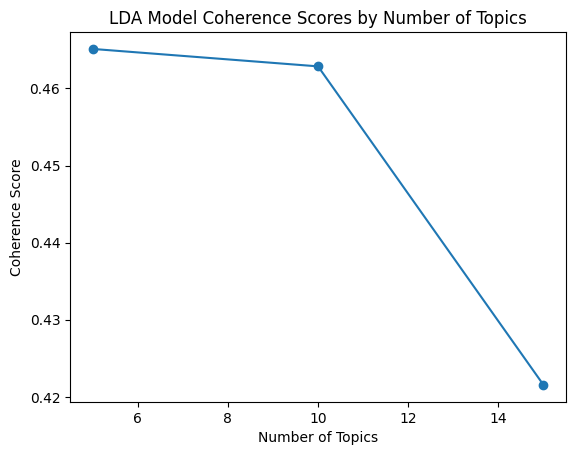

In [35]:
# Plot coherence scores
x = range(start, limit + 1, step)
plt.plot(x, coherences, marker='o')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("LDA Model Coherence Scores by Number of Topics")
plt.show()


In [ ]:
# Select the best model based on coherence scores
optimal_index = coherences.index(max(coherences))
optimal_model = models[optimal_index]

# Save the optimal model
optimal_model.save("optimal_lda_model.gensim")

topics = optimal_model.print_topics(num_words=10)
for idx, topic in topics:
    print(f"Topic {idx + 1}: {topic}")


Topic 1: 0.053*"stock" + 0.022*"week" + 0.019*"market" + 0.019*"trade" + 0.018*"52" + 0.018*"earning" + 0.016*"Benzinga" + 0.016*"company" + 0.016*"move" + 0.016*"share"
Topic 2: 0.216*"$" + 0.054*"vs" + 0.054*"Est" + 0.051*"EPS" + 0.047*"m" + 0.034*"M" + 0.029*"sale" + 0.025*"Reports" + 0.014*"Estimate" + 0.013*"Benzinga"
Topic 3: 0.025*"share" + 0.020*"update" + 0.012*"Morning" + 0.012*"Market" + 0.012*"Mid" + 0.011*"market" + 0.009*"Pro" + 0.009*"Shares" + 0.008*"Earnings" + 0.008*"Retail"
Topic 4: 0.013*"say" + 0.009*"big" + 0.009*"etfs" + 0.007*"etf" + 0.006*"Movers" + 0.006*"ETF" + 0.005*"XLF" + 0.005*"New" + 0.005*"XLE" + 0.005*"XRT"
Topic 5: 0.071*"$" + 0.034*"PT" + 0.030*"announce" + 0.028*"raise" + 0.027*"Downgrades" + 0.026*"Price" + 0.024*"Upgrades" + 0.023*"Buy" + 0.021*"Target" + 0.017*"Maintains"


## Label topics 

# 🔍 Topic Interpretations

### 1️⃣ Stock Market Movements 📈  
**Keywords:** stock, week, market, trade, 52, earning, Benzinga, company, move, share  
**What it means:** General stock activity, weekly market summaries, trading, and company earnings (including 52-week highs/lows).

---

### 2️⃣ Earnings & Financial Metrics 💰  
**Keywords:** $, vs, Est, EPS, m, M, sale, Reports, Estimate, Benzinga  
**What it means:** Earnings reports and financial results, comparing estimates vs actuals, sales data.

---

### 3️⃣ Market Updates & Trends 📊  
**Keywords:** share, update, Morning, Market, Mid, market, Pro, Shares, Earnings, Retail  
**What it means:** Market updates, daily summaries, trends in shares, earnings, and retail sectors.

---

### 4️⃣ ETFs & Sector Movers 📉📈  
**Keywords:** say, big, etfs, etf, Movers, ETF, XLF, New, XLE, XRT  
**What it means:** Exchange-Traded Funds (ETFs), sector-specific ETFs, and their big movers.

---

### 5️⃣ Analyst Ratings & Price Targets 🎯  
**Keywords:** $, PT, announce, raise, Downgrades, Price, Upgrades, Buy, Target, Maintains  
**What it means:** Analyst activities: upgrades, downgrades, price target changes, and buy/sell recommendations.


In [38]:
# Display the top words for each topic
lda_model = models[0] 
topics = lda_model.print_topics(num_words=10)

# Display all topics at once
print("Topics and their top words:")
for idx, topic in topics:
    print(f"Topic {idx + 1}: {topic}")

# Assign meaningful labels programmatically
topic_labels = {
    0: "Stock Market Movements",        # Topic 1
    1: "Earnings Reports and Financial Metrics",  # Topic 2
    2: "Market Updates and General Trends",       # Topic 3
    3: "Exchange-Traded Funds (ETFs) and Sector Movers", # Topic 4
    4: "Analyst Ratings and Price Targets",       # Topic 5
}

# Display labeled topics
print("\nLabeled Topics:")
for idx, label in topic_labels.items():
    print(f"Topic {idx + 1}: {label}")


Topics and their top words:
Topic 1: 0.053*"stock" + 0.022*"week" + 0.019*"market" + 0.019*"trade" + 0.018*"52" + 0.018*"earning" + 0.016*"Benzinga" + 0.016*"company" + 0.016*"move" + 0.016*"share"
Topic 2: 0.216*"$" + 0.054*"vs" + 0.054*"Est" + 0.051*"EPS" + 0.047*"m" + 0.034*"M" + 0.029*"sale" + 0.025*"Reports" + 0.014*"Estimate" + 0.013*"Benzinga"
Topic 3: 0.025*"share" + 0.020*"update" + 0.012*"Morning" + 0.012*"Market" + 0.012*"Mid" + 0.011*"market" + 0.009*"Pro" + 0.009*"Shares" + 0.008*"Earnings" + 0.008*"Retail"
Topic 4: 0.013*"say" + 0.009*"big" + 0.009*"etfs" + 0.007*"etf" + 0.006*"Movers" + 0.006*"ETF" + 0.005*"XLF" + 0.005*"New" + 0.005*"XLE" + 0.005*"XRT"
Topic 5: 0.071*"$" + 0.034*"PT" + 0.030*"announce" + 0.028*"raise" + 0.027*"Downgrades" + 0.026*"Price" + 0.024*"Upgrades" + 0.023*"Buy" + 0.021*"Target" + 0.017*"Maintains"

Labeled Topics:
Topic 1: Stock Market Movements
Topic 2: Earnings Reports and Financial Metrics
Topic 3: Market Updates and General Trends
Topic 4: 

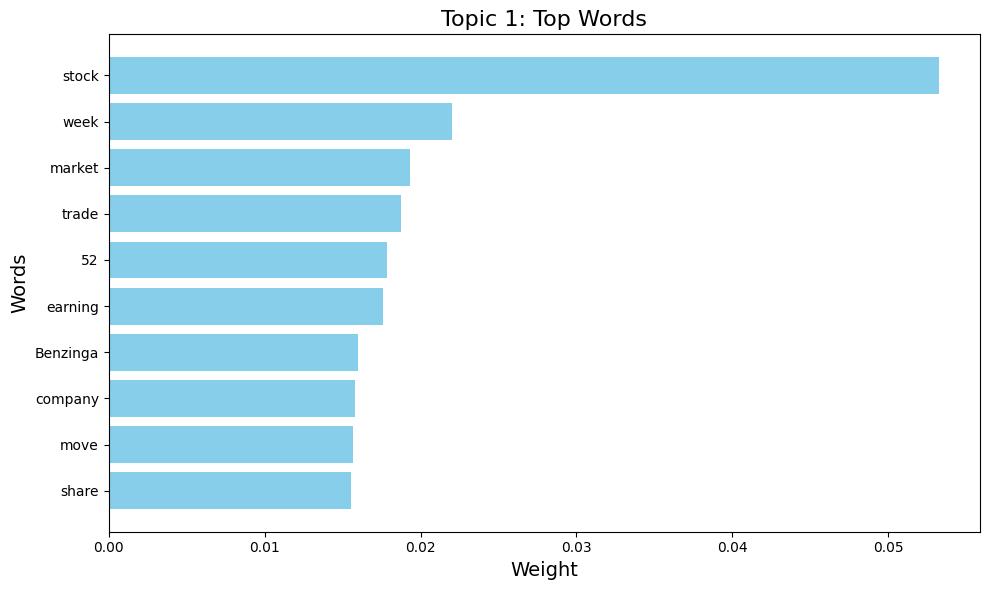

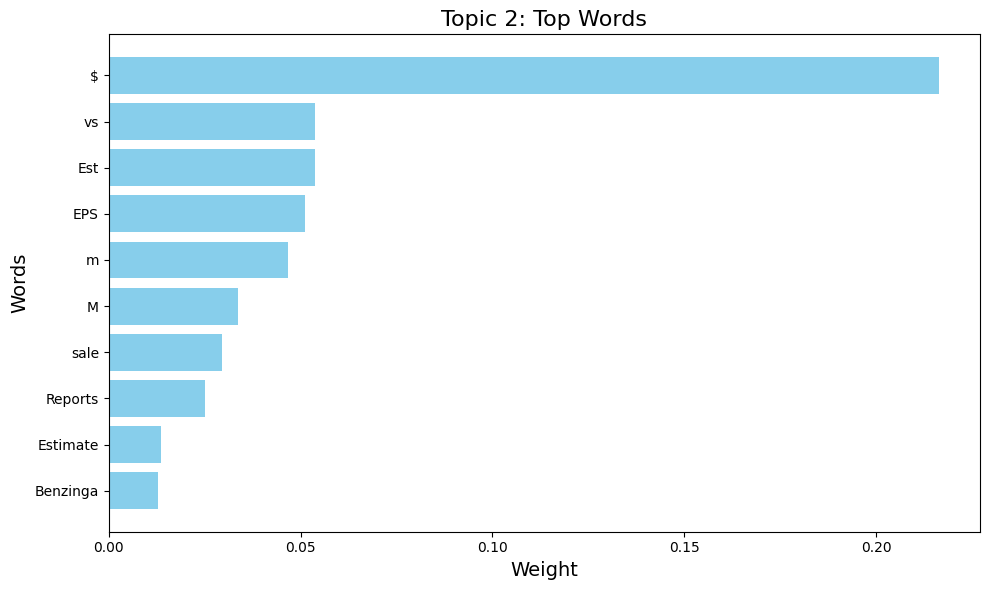

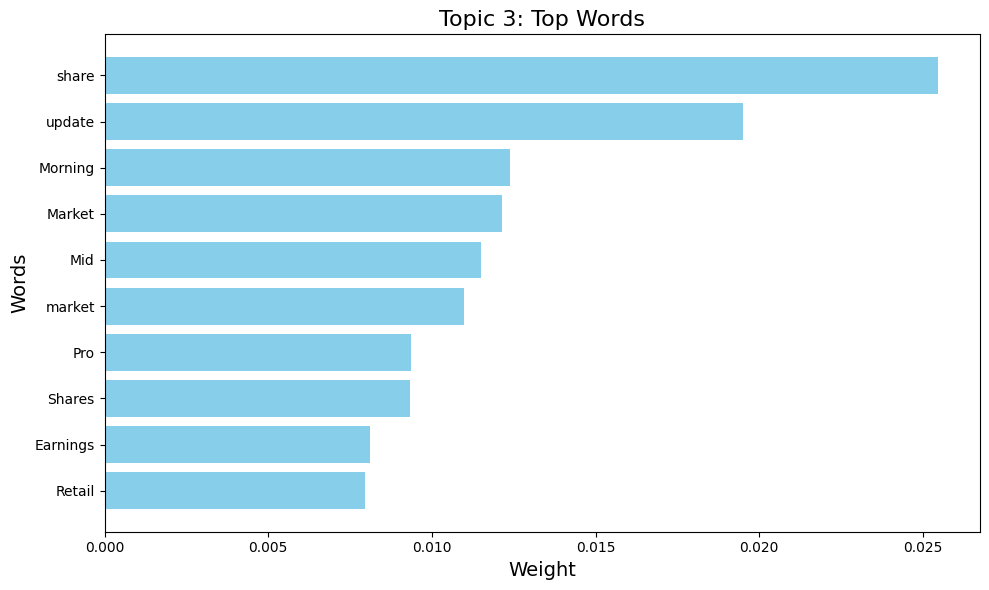

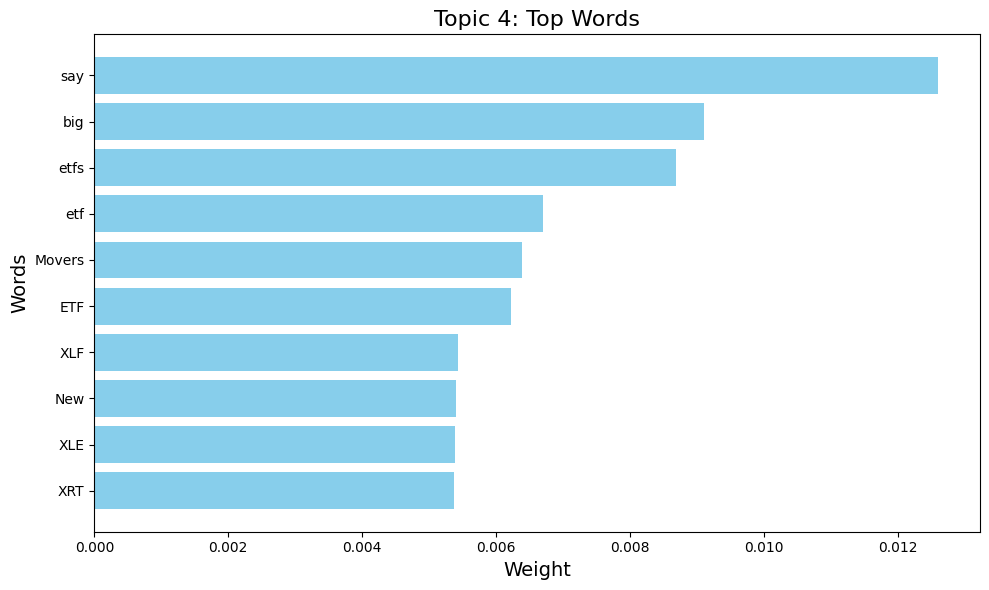

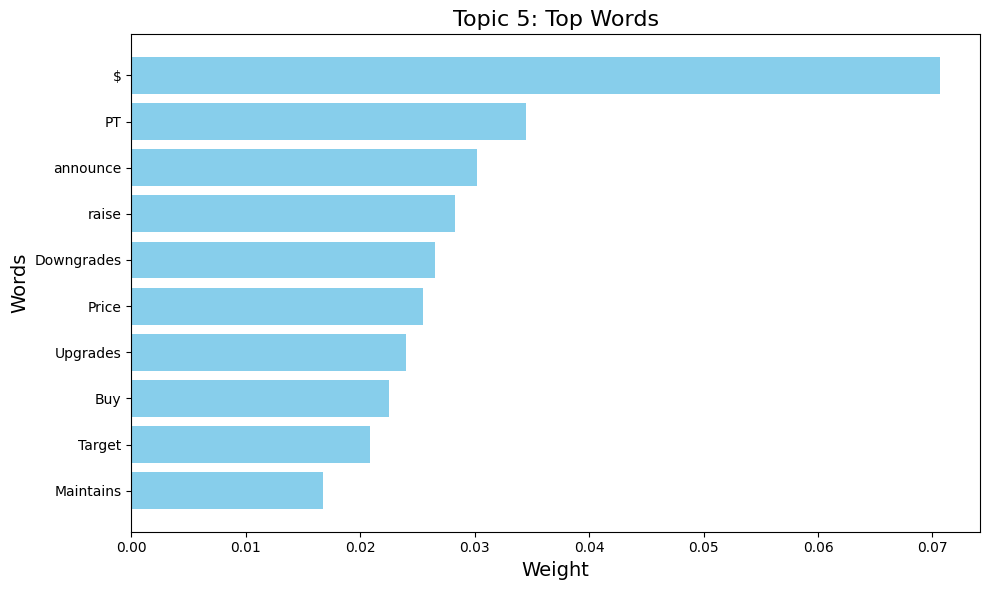

In [39]:
# Number of top words to display per topic
num_words = 10

# Get topics and their top words
topics = lda_model.show_topics(num_topics=-1, num_words=num_words, formatted=False)

# Plot each topic
for idx, topic in topics:
    # Extract words and their weights
    words = [word[0] for word in topic]
    weights = [word[1] for word in topic]
    
    # Create a DataFrame for easier plotting
    df = pd.DataFrame({"Word": words, "Weight": weights})
    
    # Create the bar chart
    plt.figure(figsize=(10, 6))
    plt.barh(df["Word"], df["Weight"], color='skyblue')
    plt.gca().invert_yaxis()  # Invert y-axis for a better visual order
    plt.title(f"Topic {idx + 1}: Top Words", fontsize=16)
    plt.xlabel("Weight", fontsize=14)
    plt.ylabel("Words", fontsize=14)
    plt.tight_layout()
    plt.show()

In [47]:
print(df.columns)


Index(['Word', 'Weight'], dtype='object')


Categorize headlines by topic or theme using the topic modeling results.

In [62]:
def preprocess_text(text):
    """Preprocess a headline: lowercase and tokenize (customize as needed)."""
    return str(text).lower().split()

def categorize_headlines(df, lda_model, dictionary, text_column='headline'):
    """
    Assign the most probable topic to each headline in the DataFrame.
    
    Args:
        df (pd.DataFrame): DataFrame containing headlines.
        lda_model: Trained gensim LDA model.
        dictionary: gensim Dictionary used during training.
        text_column (str): Name of the column with text to categorize.
        
    Returns:
        pd.DataFrame: Input df with two new columns:
            - 'dominant_topic': topic index (int)
            - 'topic_label': human-readable topic label (str)
    """
    # Preprocess all headlines
    preprocessed = [preprocess_text(text) for text in df[text_column]]

    # Convert to bag-of-words using the training dictionary
    corpus = [dictionary.doc2bow(text) for text in preprocessed]

    topic_probs = []
    for bow in corpus:
        dist = lda_model.get_document_topics(bow, minimum_probability=0.0)
        topic_probs.append([prob for _, prob in dist])

    topic_probs = np.array(topic_probs)
    dominant_topics = np.argmax(topic_probs, axis=1)

    # Define your topic labels (customize as needed)
    topic_labels = {
        0: "Stock Market Movements",
        1: "Earnings Reports and Financial Metrics",
        2: "Market Updates and General Trends",
        3: "ETFs and Sector Movers",
        4: "Analyst Ratings and Price Targets",
    }

    df['dominant_topic'] = dominant_topics
    df['topic_label'] = df['dominant_topic'].map(topic_labels)

    return df


df = categorize_headlines(df, lda_model, dictionary)
print(df[['headline', 'dominant_topic', 'topic_label']].head())


                                            headline  dominant_topic  \
0            Stocks That Hit 52-Week Highs On Friday               0   
1         Stocks That Hit 52-Week Highs On Wednesday               0   
2                      71 Biggest Movers From Friday               0   
3       46 Stocks Moving In Friday's Mid-Day Session               4   
4  B of A Securities Maintains Neutral on Agilent...               4   

                         topic_label  
0             Stock Market Movements  
1             Stock Market Movements  
2             Stock Market Movements  
3  Analyst Ratings and Price Targets  
4  Analyst Ratings and Price Targets  


# sentiment analysis

 Perform sentiment analysis on headlines using TextBlob

In [65]:

# Apply TextBlob sentiment polarity (-1 to 1) on each headline
df['sentiment_polarity'] = df['headline'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Define sentiment label based on polarity
def label_sentiment(polarity):
    if polarity > 0.1:
        return 'positive'
    elif polarity < -0.1:
        return 'negative'
    else:
        return 'neutral'

df['sentiment_label'] = df['sentiment_polarity'].apply(label_sentiment)

print(df[['headline', 'sentiment_polarity', 'sentiment_label']].head())


                                            headline  sentiment_polarity  \
0            Stocks That Hit 52-Week Highs On Friday                 0.0   
1         Stocks That Hit 52-Week Highs On Wednesday                 0.0   
2                      71 Biggest Movers From Friday                 0.0   
3       46 Stocks Moving In Friday's Mid-Day Session                 0.0   
4  B of A Securities Maintains Neutral on Agilent...                 0.0   

  sentiment_label  
0         neutral  
1         neutral  
2         neutral  
3         neutral  
4         neutral  


In [67]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Assuming df has columns: 'headline' and 'sentiment_label'

# Preprocess headlines
df['clean_headline'] = df['headline'].str.lower()

# Vectorize without converting to dense
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['clean_headline'])
words = vectorizer.get_feature_names_out()

# Get sentiment labels as a numpy array
sentiments = df['sentiment_label'].values

# Create a DataFrame to store aggregated word counts per sentiment
sentiment_categories = df['sentiment_label'].unique()
word_freq_per_sentiment = pd.DataFrame(0, index=sentiment_categories, columns=words, dtype=np.int32)

# Sum word counts for each sentiment category without converting full matrix to dense
for sentiment in sentiment_categories:
    # Indices of rows with current sentiment
    indices = np.where(sentiments == sentiment)[0]
    
    # Sum the rows corresponding to these indices (still sparse)
    sentiment_matrix = X[indices, :]
    
    # Sum word counts across all these rows (axis=0)
    word_counts = sentiment_matrix.sum(axis=0)  # This is a matrix
    
    # Convert to array and assign to DataFrame row
    word_freq_per_sentiment.loc[sentiment, :] = np.array(word_counts).flatten()

# Normalize frequencies to proportions
word_freq_norm = word_freq_per_sentiment.div(word_freq_per_sentiment.sum(axis=1), axis=0)

# Print top 10 words for each sentiment
for sentiment in word_freq_norm.index:
    print(f"\nTop words in {sentiment} headlines:")
    print(word_freq_norm.loc[sentiment].sort_values(ascending=False).head(10))



Top words in neutral headlines:
vs          0.016313
est         0.014181
stocks      0.012644
eps         0.012026
reports     0.009932
market      0.008937
earnings    0.007779
shares      0.007337
pt          0.007214
sales       0.007102
Name: neutral, dtype: float64

Top words in positive headlines:
benzinga      0.019919
stocks        0.015653
higher        0.014054
shares        0.011943
new           0.011318
upgrades      0.009909
downgrades    0.009331
market        0.009208
trading       0.007501
update        0.007417
Name: positive, dtype: float64

Top words in negative headlines:
shares    0.016424
market    0.013963
mid       0.012796
stock     0.011465
day       0.010205
update    0.009976
common    0.009532
losers    0.009054
price     0.008448
oil       0.008244
Name: negative, dtype: float64
